In [1]:
import requests
import builtins
import cv2
import pymupdf
import os
from PIL import Image
import pytesseract
import docx
import numpy as np
import pandas as pd

In [2]:
def gazete_api(gazete_adi):
    resp = requests.get("http://nek.istanbul.edu.tr:4444/ekos/GAZETE/gazete.php", {"gazete" : gazete_adi})
    return resp.text
def harf_cevirme(kelime):
    harfler = {"ç" : "c", "ğ" : "g", "ı" : "i", "ö" : "o", "ş": "s", "ü" : "u"}
    kelime = kelime.lower()
    for i in kelime:
        if i in harfler.keys():
            kelime = kelime.replace(i, harfler[i])
    return kelime.replace(" ", "").replace("-" ,"")

In [20]:
gazete_adi = input("Hangi gazete?  ")
gazete_adi = harf_cevirme(gazete_adi)
gazete_html = gazete_api(gazete_adi)
gazete_html = gazete_html.split("\"")
bos_str = ""
yil = input("Hangi yılın sayısı?  ")
ay = input("Hangi ay? ")
gun = input("Hangi gün?  ")
yil = harf_cevirme(yil)
ay = harf_cevirme(ay)
gun = harf_cevirme(gun)

In [24]:
try:
    for i in gazete_html:
        if yil in i and ay in i:
            if len(gun) == 1:
                if "_" + gun == i[-7:-5]:
                    gazete_link = bos_str + i
                    break
            elif len(gun) == 2:
                if gun == i[-7:-5]:
                    gazete_link = bos_str + i
                    break
            else:
                gazete_link = bos_str + i
    if len(gun) != 0:
        response = requests.get(gazete_link)
        with open('gazete.pdf', 'wb') as f:
            f.write(response.content)
        print(gazete_link)
except:
    print("sayı yok")

http://nek.istanbul.edu.tr:4444/ekos/GAZETE/anadolu/anadolu_1937/anadolu_1937_mart_/anadolu_1937_mart_13_.pdf


In [33]:
doc = pymupdf.open("gazete.pdf")
sayfa = int(input("Hangi sayfa?  "))
sayfa -= 1
page = doc.load_page(sayfa)
pix = page.get_pixmap()
output = "resim.png"
pix.save(output)
doc.close()
src = cv2.imread('resim.png')
scale_percent = 55
width = int(src.shape[1] * scale_percent / 100)
height = int(src.shape[0] * scale_percent / 100)
dsize = (width, height)
output = cv2.resize(src, dsize)
cv2.imwrite('kucukresim.png',output)
img = cv2.imread('kucukresim.png')
x_vector = []
y_vector = []
def on_EVENT_LBUTTONDOWN(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        xy = "%d,%d" % (x, y)
        x_vector.append(x)
        y_vector.append(y)
        cv2.circle(img, (x, y), 1, (0, 0, 255), thickness = 2)
        cv2.imshow("image", img)
        print(x,y)
cv2.namedWindow("image")
cv2.setMouseCallback("image", on_EVENT_LBUTTONDOWN)
cv2.imshow("image", img)
cv2.waitKey(0)

402 344
499 389


-1

In [29]:
out_tip = input("Resim için 'r', yazı için 'y', tablo için 't' harfine basınız")


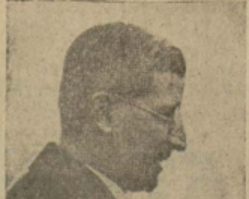

In [12]:
if out_tip == "r":
    coordinates = (int(min(x_vector)*100/55), int(min(y_vector)*100/55), int(max(x_vector)*100/55), int(max(y_vector)*100/55))
    im = Image.open(r"resim.png")  
    im1 = im.crop(coordinates)
    im1 = im1.resize((int(1.5*im1.size[0]),int(1.5*im1.size[1])))
    display(im1)
    im1 = im1.save("istenilenresim.png")

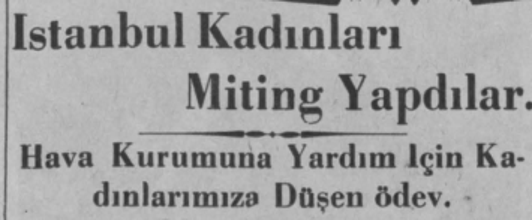

Istanbul Kadınları o

Miting Yapdılar.

Hava Kurumuna Yardım Için Kadınlarımıza Düşen ödev. 


In [8]:
if out_tip == "y":
    coordinates = (int(min(x_vector)*100/55), int(min(y_vector)*100/55), int(max(x_vector)*100/55), int(max(y_vector)*100/55))
    im = Image.open(r"resim.png").convert('LA')   
    im1 = im.crop(coordinates)
    im1 = im1.resize((int(1.5*im1.size[0]),int(1.5*im1.size[1])))
    display(im1)
    text = pytesseract.image_to_string(im1, lang = "tur", config='--psm 6')
    text = text.replace("\x0c", "")
    text = text.replace("-\n", "")
    print(text)
    mydoc = docx.Document()
    mydoc.add_paragraph(text)
    mydoc.save("istenilenword.docx")

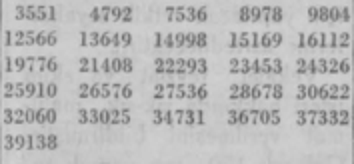

(3551 4792 7536 6976 9804
12566 13649 14998 15169 16112
19776. 21408 22293 23453 24326
25910 26516 27536 28678 30622
32060 33025 34731 36705 37332
39138

        0      1      2      3      4
0   (3551   4792   7536   6976   9804
1   12566  13649  14998  15169  16112
2  19776.  21408  22293  23453  24326
3   25910  26516  27536  28678  30622
4   32060  33025  34731  36705  37332
5   39138   None   None   None   None
6           None   None   None   None


In [34]:
if out_tip == "t":
    coordinates = (int(min(x_vector)*100/55), int(min(y_vector)*100/55), int(max(x_vector)*100/55), int(max(y_vector)*100/55))
    im = Image.open(r"resim.png").convert('LA')   
    im1 = im.crop(coordinates)
    im1 = im1.resize((int(2*im1.size[0]),int(2*im1.size[1])))
    display(im1)
    text = pytesseract.image_to_string(im1, lang = "tur", config='--psm 6')
    text = text.replace("\x0c", "")
    print(text)
    data = text
    df = pd.DataFrame([x.split(' ') for x in data.split('\n')])
    print(df)
    tablo_tipi = input("Excel için 'e' csv için 'c' harfine basınız")
    if tablo_tipi == "e":
        df.to_excel("istenilenexcel.xlsx")
    elif tablo_tipi == "c":
        df.to_csv('istenilencsv.csv')